In [1]:
!pip install sdv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.2/181.2 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 87.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.8/73.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.5/193.5 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the data
df = pd.read_excel('/content/Supplementary data 3.xlsx')

In [3]:
from sdv.metadata import SingleTableMetadata
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(df)

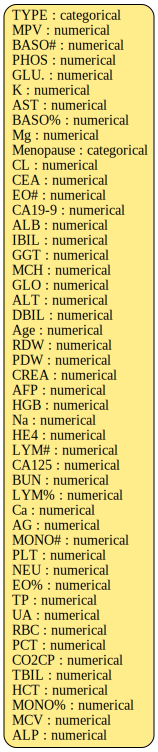

In [4]:
metadata.visualize()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 49 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TYPE       235 non-null    int64  
 1   MPV        235 non-null    float64
 2   BASO#      235 non-null    float64
 3   PHOS       235 non-null    float64
 4   GLU.       235 non-null    float64
 5   K          235 non-null    float64
 6   AST        235 non-null    float64
 7   BASO%      235 non-null    float64
 8   Mg         235 non-null    float64
 9   Menopause  235 non-null    int64  
 10  CL         235 non-null    float64
 11  CEA        235 non-null    float64
 12  EO#        235 non-null    float64
 13  CA19-9     235 non-null    float64
 14  ALB        235 non-null    float64
 15  IBIL       235 non-null    float64
 16  GGT        235 non-null    float64
 17  MCH        235 non-null    float64
 18  GLO        235 non-null    float64
 19  ALT        235 non-null    float64
 20  DBIL      

In [10]:
df.describe()

,TYPE,MPV,BASO#,PHOS,GLU.,K,AST,BASO%,Mg,Menopause,...,TP,UA,RBC,PCT,CO2CP,TBIL,HCT,MONO%,MCV,ALP
count,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,...,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000
mean,0.378723,9.647863,0.031362,1.109957,5.371617,4.446468,18.069565,0.531234,1.009830,0.382979,...,70.497826,237.475319,4.339532,0.244983,24.285106,8.103913,0.381026,5.839574,87.911915,75.430435
std,0.486104,1.894356,0.021952,0.186202,1.264869,0.382794,7.505237,0.363918,0.128202,0.487151,...,7.804926,71.295457,0.438495,0.087589,2.491659,3.229542,0.042633,1.756369,6.026617,24.290477
min,0.000000,5.060000,0.000000,0.650000,3.570000,3.080000,7.000000,0.000000,0.650000,0.000000,...,32.900000,96.000000,2.640000,0.070000,19.300000,2.500000,0.224000,0.300000,61.000000,26.000000
25%,0.000000,8.210000,0.020000,0.990000,4.680000,4.210000,13.000000,0.290000,0.920000,0.000000,...,66.650000,194.700000,4.100000,0.184000,22.550000,5.750000,0.357000,4.700000,85.600000,61.000000
50%,0.000000,9.800000,0.030000,1.110000,5.070000,4.430000,17.000000,0.490000,1.000000,0.000000,...,72.100000,226.300000,4.330000,0.235000,24.000000,7.700000,0.385000,5.800000,88.800000,71.000000
75%,1.000000,11.000000,0.040000,1.215000,5.625000,4.700000,20.000000,0.740000,1.085000,1.000000,...,75.950000,268.850000,4.625000,0.290000,25.700000,9.500000,0.406000,6.800000,91.300000,87.000000
max,1.000000,14.500000,0.120000,1.670000,12.440000,5.390000,51.000000,1.940000,1.370000,1.000000,...,83.800000,632.000000,6.740000,0.690000,34.300000,22.700000,0.569000,12.140000,103.400000,186.000000


In [12]:
from sdv.single_table import CopulaGANSynthesizer

synthesizer = CopulaGANSynthesizer(metadata)
synthesizer.fit(df)

synthetic_data = synthesizer.sample(num_rows=2000)

/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:162: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)


InvalidMetadataError: The metadata is not validTable 'table' has 0 columns. Use 'add_column' to specify its columns.

In [6]:
synthesizer = CopulaGANSynthesizer(
    metadata, # required
    enforce_min_max_values=True,
    enforce_rounding=False,
    epochs=500,
    verbose=True
)

/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:162: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)


In [ ]:
synthetic_data.to_csv('synthetic_data_copula.csv', index=False)

In [ ]:
from sdv.evaluation.single_table import run_diagnostic

diagnostic = run_diagnostic(
    real_data=df,
    synthetic_data=synthetic_data,
    metadata=metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 49/49 [00:00<00:00, 1208.03it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 116.96it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



In [ ]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    df,
    synthetic_data,
    metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 49/49 [00:00<00:00, 210.25it/s]|
Column Shapes Score: 64.64%

(2/2) Evaluating Column Pair Trends: |██████████| 1176/1176 [00:08<00:00, 134.93it/s]|
Column Pair Trends Score: 90.74%

Overall Score (Average): 77.69%



In [ ]:
quality_report.get_details('Column Shapes')

,Column,Metric,Score
0,TYPE,TVComplement,0.945723
1,MPV,KSComplement,0.836181
2,BASO#,KSComplement,0.076596
3,PHOS,KSComplement,0.829851
4,GLU.,KSComplement,0.626138
5,K,KSComplement,0.501670
6,AST,KSComplement,0.856894
7,BASO%,KSComplement,0.663904
8,Mg,KSComplement,0.898128
9,Menopause,TVComplement,0.965979


In [ ]:
from sdv.evaluation.single_table import get_column_plot

fig = get_column_plot(
    real_data=df,
    synthetic_data=synthetic_data,
    column_name='TYPE',
    metadata=metadata
)

fig.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df2 = pd.read_csv('/content/synthetic_data.csv')
# Select features (excluding the 'SUBJECT_ID' and the target 'TYPE')
X = df2.drop(columns=['TYPE'])
y = df2['TYPE']

# Standardize the features for better performance in logistic regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Let's inspect the shapes to make sure everything looks correct
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 48), (400, 48), (1600,), (400,))

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
log_reg = LogisticRegression(max_iter=1000)

# Train the model using the training data
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = log_reg.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7075


In [ ]:
# Get the feature coefficients (weights)
coefficients = log_reg.coef_[0]

# Function to calculate the sigmoid of a value
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Function to calculate the summary for each data point
def generate_summary(X_test, coefficients, feature_names, model):
    results = []

    # Compute the linear model (dot product of X and coefficients) and the probabilities
    linear_model = np.dot(X_test, coefficients) + model.intercept_[0]
    probabilities = sigmoid(linear_model)

    # Loop through each data point in the test set
    for idx, (sample, prob) in enumerate(zip(X_test, probabilities)):
        # Calculate contributions for all features for this sample
        contributions = sample * coefficients
        absolute_contributions = np.abs(contributions)

        # Find the most important feature (the one with the highest absolute contribution)
        most_important_feature_idx = np.argmax(absolute_contributions)
        most_important_feature = feature_names[most_important_feature_idx]
        contribution_value = contributions[most_important_feature_idx]

        # Add the summary for this data point
        results.append({
            'Data Point': idx + 1,
            'Most Important Feature': most_important_feature,
            'Contribution Value': contribution_value,
            'Predicted Probability (P(y=1))': prob
        })

    # Convert results to a DataFrame
    summary_df = pd.DataFrame(results)

    return summary_df

# Generate the summary for all test samples
summary_table = generate_summary(X_test, coefficients, X.columns, log_reg)

# Display the first few rows of the summary
summary_table.head(20)  # Displaying the top 20 rows for brevity

,Data Point,Most Important Feature,Contribution Value,Predicted Probability (P(y=1))
0,1,PLT,0.350847,0.414706
1,2,Na,1.071330,0.792810
2,3,Na,0.940026,0.595833
3,4,Na,0.388545,0.857101
4,5,Na,-0.675026,0.208294
5,6,Na,-0.648765,0.453385
6,7,Na,-0.504329,0.292268
7,8,CREA,-0.790086,0.271812
8,9,Menopause,-0.338891,0.223366
9,10,ALB,-0.660799,0.372569


In [ ]:
summary_table['Most Important Feature'].value_counts()

,count
Most Important Feature,
DBIL,99
ALT,50
LYM%,46
MCV,39
Na,22
ALP,20
GLO,15
BUN,15
IBIL,14


For running only customize features

In [ ]:
# Step 1: Extract the list of important features from the summary table
important_features = summary_table['Most Important Feature'].unique()

# Step 2: Filter the dataset to only include important features
features = [feature for feature in important_features if feature in df2.columns]

# Step 3: Add the important features to X
X = df2[features].values

print(f"Updated X now includes only important features: {features}")


# Step 4: Include the target label
selected_features_df = df2[features + ['TYPE']]  # Assuming 'TYPE' is the target column

# Step 5: Save the selected features to a CSV file
selected_features_df.to_csv('sel_features.csv', index=False)

print("Selected features and labels saved to 'sel_features.csv'.")


Updated X now includes only important features: ['PLT', 'Na', 'CREA', 'Menopause', 'ALB', 'IBIL', 'BUN', 'MCV', 'EO#', 'MONO%', 'UA', 'EO%', 'GGT', 'Ca', 'Mg', 'NEU', 'MPV', 'CEA', 'Age']
Selected features and labels saved to 'sel_features.csv'.


Completed

In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Load the dataset
data = pd.read_csv('synthetic_data_Copula.csv')

# Preprocess the data
#X = data.drop('label', axis=1)  # Replace 'label' with the actual label column name
y = data['TYPE']  # Replace 'label' with the actual label column name

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a PyTorch Dataset
class TabularDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.long)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = TabularDataset(X_train, y_train)
test_dataset = TabularDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define a simple transformer model
class SimpleTransformer(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(SimpleTransformer, self).__init__()
        self.transformer = nn.Transformer(d_model=input_dim, nhead=4, num_encoder_layers=2)
        self.fc = nn.Linear(input_dim, num_classes)

    def forward(self, x):
        x = x.unsqueeze(1)  # Add sequence dimension
        x = self.transformer(x, x)
        x = x.mean(dim=1)  # Global average pooling
        x = self.fc(x)
        return x

# Initialize the model, loss function, and optimizer
model = SimpleTransformer(input_dim=X_train.shape[1], num_classes=len(y.unique()))
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
for epoch in range(10):  # Number of epochs
    model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

# Evaluate the model
model.eval()
y_pred = []
with torch.no_grad():
    for X_batch, _ in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.numpy())

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of SAINT-like model:', accuracy)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:379: UserWarning:

enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)



Accuracy of SAINT-like model: 0.595


Epoch 10/10, Loss: 0.3111, Train Acc: 0.9537, Test Acc: 0.9575
Final Test Accuracy: 0.9575

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       236
           1       0.95      0.95      0.95       164

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400


Confusion Matrix:
[[228   8]
 [  9 155]]

ROC-AUC Score: 0.9970


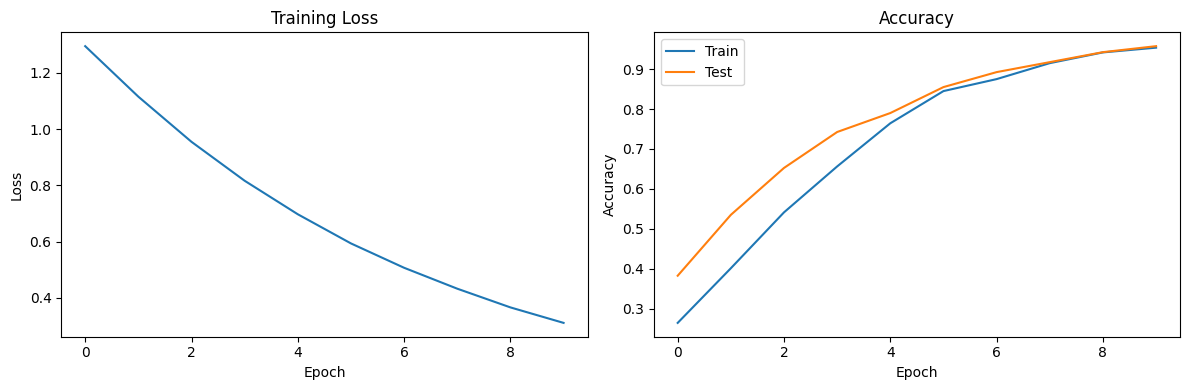

In [ ]:
# Load the synthetic data from CSV and prepare it for the SAINT model
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import torch.nn.functional as F

# Load the data
file_path = '/content/sel_features.csv'
data = pd.read_csv(file_path)

# Split features and target

X = data.values
y = data['TYPE'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# Define the SAINT model
class SimpleSAINT(nn.Module):
    def __init__(self, input_dim, hidden_dim=64, num_heads=4, num_classes=3):
        super(SimpleSAINT, self).__init__()
        self.embedding = nn.Linear(input_dim, hidden_dim)
        self.attention = nn.MultiheadAttention(
            embed_dim=hidden_dim,
            num_heads=num_heads,
            batch_first=True
        )
        self.ffn = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim * 2),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(hidden_dim * 2, hidden_dim)
        )
        self.norm1 = nn.LayerNorm(hidden_dim)
        self.norm2 = nn.LayerNorm(hidden_dim)
        self.classifier = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        if len(x.shape) == 2:
            x = x.unsqueeze(1)
        attention_out, _ = self.attention(x, x, x)
        x = self.norm1(x + attention_out)
        ffn_out = self.ffn(x)
        x = self.norm2(x + ffn_out)
        x = torch.mean(x, dim=1)
        x = self.classifier(x)
        return x

# Initialize model, loss function, and optimizer
input_dim = X_train.shape[1]
model = SimpleSAINT(input_dim=input_dim, hidden_dim=64, num_heads=4, num_classes=3)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
train_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(num_epochs):
    # Training
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    # Calculate training accuracy
    _, predicted_train = torch.max(outputs.data, 1)
    train_acc = accuracy_score(y_train.numpy(), predicted_train.numpy())

    # Calculate test accuracy
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        _, predicted_test = torch.max(test_outputs.data, 1)
        test_acc = accuracy_score(y_test.numpy(), predicted_test.numpy())

    # Store metrics
    train_losses.append(loss.item())
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}")

# Final evaluation
model.eval()
with torch.no_grad():
    final_outputs = model(X_test)
    _, predicted = torch.max(final_outputs.data, 1)
    final_accuracy = accuracy_score(y_test.numpy(), predicted.numpy())

print(f"Final Test Accuracy: {final_accuracy:.4f}")

# Classification Metrics (From Code 1)
print("\nClassification Report:")
print(classification_report(y_test.numpy(), predicted.numpy()))

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_test.numpy(), predicted.numpy())
print("\nConfusion Matrix:")
print(conf_matrix)

# Compute ROC-AUC Score (for binary classification)
if len(set(y_test.numpy())) == 2:  # Ensure binary classification
    y_probs = F.softmax(final_outputs, dim=1)[:, 1].numpy()  # Get probabilities for class 1
    roc_auc = roc_auc_score(y_test.numpy(), y_probs)
    print(f"\nROC-AUC Score: {roc_auc:.4f}")

# Plot training curves
plt.figure(figsize=(12, 4))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Accuracy curves
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train')
plt.plot(test_accuracies, label='Test')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

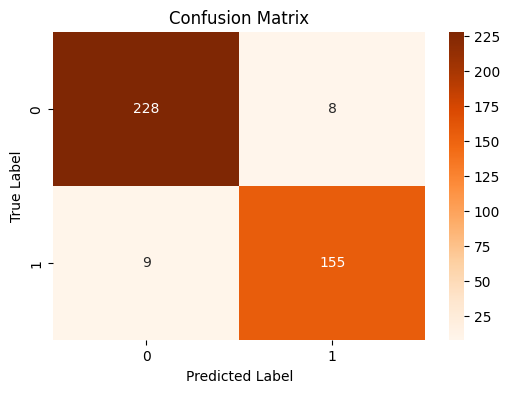

In [ ]:
import seaborn as sns

# Plot Confusion Matrix as a Table
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges', xticklabels=set(y_test.numpy()), yticklabels=set(y_test.numpy()))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
#BORUTA + SAINT
!pip install boruta

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.preprocessing import StandardScaler

# Load your data
df = pd.read_csv("/content/synthetic_data_copula.csv")
X = df.drop(columns=['TYPE'])
y = df['TYPE']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize Random Forest and Boruta
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', random_state=42)
boruta = BorutaPy(estimator=rf, n_estimators='auto', random_state=42, max_iter=100)

# Fit Boruta
boruta.fit(X_scaled, y.values)

# Select features
selected_features = X.columns[boruta.support_].tolist()
X_selected = df[selected_features]
X_selected['TYPE'] = y

# Save to CSV
X_selected.to_csv('sel_features_copula.csv', index=False)
print(f"Selected {len(selected_features)} features saved to 'sel_features.csv'.")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 3.4 MB/s eta 0:00:00
Selected 13 features saved to 'sel_features.csv'.


<ipython-input-1-561732191>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected['TYPE'] = y



=== Feature Scores (Mutual Information) ===
      Feature  MI Score
14       IBIL  0.032516
8   Menopause  0.029594
16        MCH  0.025874
10        CEA  0.022725
47        ALP  0.021350
33         AG  0.019202
9          CL  0.016842
19       DBIL  0.016328
6       BASO%  0.016297
26         Na  0.014784
2        PHOS  0.013083
39         UA  0.011739
7          Mg  0.011721
29      CA125  0.011328
4           K  0.011291
37        EO%  0.011108
30        BUN  0.009418
41        PCT  0.008873
46        MCV  0.008232
22        PDW  0.007463
20        Age  0.007071
11        EO#  0.006734
42      CO2CP  0.006635
21        RDW  0.006584
3        GLU.  0.005967
32         Ca  0.005737
24        AFP  0.004242
13        ALB  0.004120
28       LYM#  0.003936
43       TBIL  0.002926
38         TP  0.002372
12     CA19-9  0.001866
27        HE4  0.000000
5         AST  0.000000
45      MONO%  0.000000
44        HCT  0.000000
40        RBC  0.000000
15        GGT  0.000000
17        GLO  0.00

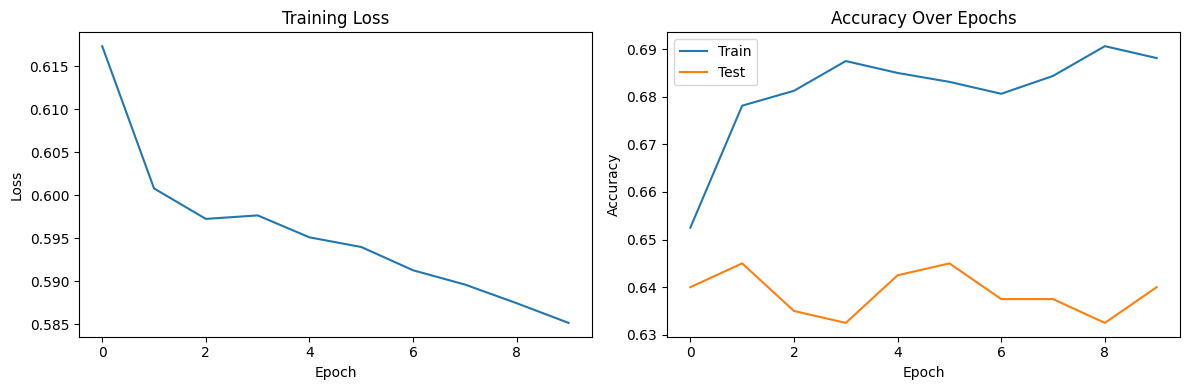

In [ ]:
# Step 1: MI Feature Selection
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load your data
df = pd.read_csv('/content/synthetic_data_copula.csv')  # <-- Update this path

# Separate features and target
X = df.drop(columns=['TYPE'])
y = df['TYPE']

# Ensure column names are strings
X.columns = X.columns.astype(str)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Mutual Information scores
mi_scores = mutual_info_classif(X_scaled, y, random_state=42)

# Display feature scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'MI Score': mi_scores
}).sort_values(by='MI Score', ascending=False)

print("\n=== Feature Scores (Mutual Information) ===")
print(feature_scores)

# Select top 10 features
top_features = feature_scores['Feature'][:10].tolist()
print("\n=== Top 10 Selected Features ===")
print(top_features)

X_selected = df[top_features]

# Step 2: Train/Test Split and Scaling
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: SAINT Model Setup
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Convert to tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train.values)
y_test = torch.LongTensor(y_test.values)

# Define SAINT model
class SimpleSAINT(nn.Module):
    def __init__(self, input_dim, hidden_dim=64, num_heads=4, num_classes=2):
        super(SimpleSAINT, self).__init__()
        self.embedding = nn.Linear(input_dim, hidden_dim)
        self.attention = nn.MultiheadAttention(embed_dim=hidden_dim, num_heads=num_heads, batch_first=True)
        self.ffn = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim * 2),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(hidden_dim * 2, hidden_dim)
        )
        self.norm1 = nn.LayerNorm(hidden_dim)
        self.norm2 = nn.LayerNorm(hidden_dim)
        self.classifier = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        if len(x.shape) == 2:
            x = x.unsqueeze(1)
        attention_out, _ = self.attention(x, x, x)
        x = self.norm1(x + attention_out)
        ffn_out = self.ffn(x)
        x = self.norm2(x + ffn_out)
        x = torch.mean(x, dim=1)
        x = self.classifier(x)
        return x

# Initialize model
input_dim = X_train.shape[1]
model = SimpleSAINT(input_dim=input_dim, hidden_dim=64, num_heads=4, num_classes=2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
train_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    _, predicted_train = torch.max(outputs.data, 1)
    train_acc = accuracy_score(y_train.numpy(), predicted_train.numpy())

    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        _, predicted_test = torch.max(test_outputs.data, 1)
        test_acc = accuracy_score(y_test.numpy(), predicted_test.numpy())

    train_losses.append(loss.item())
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    print(f"Epoch {epoch+1}/{num_epochs} | Loss: {loss.item():.4f} | Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")

# Final Evaluation
model.eval()
with torch.no_grad():
    final_outputs = model(X_test)
    _, predicted = torch.max(final_outputs.data, 1)
    final_accuracy = accuracy_score(y_test.numpy(), predicted.numpy())

print(f"\n=== Final Test Accuracy: {final_accuracy:.4f} ===")
print("\n=== Classification Report ===")
print(classification_report(y_test.numpy(), predicted.numpy()))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test.numpy(), predicted.numpy()))

# ROC-AUC (binary only)
if len(set(y_test.numpy())) == 2:
    y_probs = F.softmax(final_outputs, dim=1)[:, 1].numpy()
    roc_auc = roc_auc_score(y_test.numpy(), y_probs)
    print(f"=== ROC-AUC Score: {roc_auc:.4f} ===")

# Plotting
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train')
plt.plot(test_accuracies, label='Test')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()



Feature Scores:
      Feature  MI Score
27        HE4  0.292832
29      CA125  0.186252
20        Age  0.150807
31       LYM%  0.132750
41        PCT  0.114418
22        PDW  0.104889
47        ALP  0.092731
8   Menopause  0.090702
42      CO2CP  0.087989
13        ALB  0.085540
36        NEU  0.078655
10        CEA  0.075098
23       CREA  0.069751
7          Mg  0.069654
1       BASO#  0.060741
12     CA19-9  0.057359
5         AST  0.056735
4           K  0.054657
28       LYM#  0.050480
16        MCH  0.048901
24        AFP  0.041602
30        BUN  0.040598
37        EO%  0.038449
9          CL  0.038432
26         Na  0.033714
45      MONO%  0.028765
6       BASO%  0.027377
35        PLT  0.025928
46        MCV  0.023807
34      MONO#  0.020228
14       IBIL  0.017407
3        GLU.  0.016969
18        ALT  0.012851
25        HGB  0.009962
0         MPV  0.003813
19       DBIL  0.000000
33         AG  0.000000
32         Ca  0.000000
38         TP  0.000000
39         UA  0.000000

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.3674 - loss: 56.1575 - val_accuracy: 0.4474 - val_loss: 4.3128
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6246 - loss: 6.1961 - val_accuracy: 0.5000 - val_loss: 7.2064
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6721 - loss: 4.6254 - val_accuracy: 0.5263 - val_loss: 3.2756
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6278 - loss: 4.1671 - val_accuracy: 0.7895 - val_loss: 2.3265
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7045 - loss: 3.3669 - val_accuracy: 0.8421 - val_loss: 2.1971
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7249 - loss: 1.8159 - val_accuracy: 0.8421 - val_loss: 1.8527
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7280 - loss: 4.1690 - val_accuracy: 0.7632 - val_loss: 1.5823
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6815 - loss: 2.5803 - val_accuracy: 0.7632 - val_loss: 1.5231
E

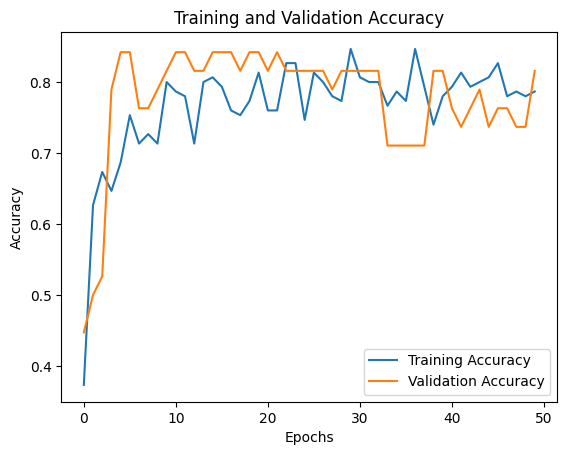

In [ ]:
#MI + FCNN
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = df.drop(columns=['TYPE'])
y = df['TYPE']

# Ensure all column names are strings
X.columns = X.columns.astype(str)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate Mutual Information scores
mi_scores = mutual_info_classif(X_scaled, y, random_state=42)

# Create a DataFrame to display feature scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'MI Score': mi_scores
}).sort_values(by='MI Score', ascending=False)

# Display the feature scores
print("\nFeature Scores:")
print(feature_scores)

# Select top features (e.g., top 10 based on MI Score)
top_features = feature_scores['Feature'][:10].tolist()
print("\nTop Selected Features:", top_features)

# Filter the dataset to keep only the top selected features
X_selected = X[top_features]

import tensorflow as tf
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_selected.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # For binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

# Evaluate on the test set
y_pred = (model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {accuracy}")

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()



✅ Best Alpha: 0.0066

=== Feature Scores ===
      Feature  Coefficient
26         Na     0.059398
14       IBIL     0.056728
21        RDW     0.056426
19       DBIL     0.044744
43       TBIL     0.044616
6       BASO%     0.026434
32         Ca     0.025828
13        ALB     0.021939
40        RBC     0.013107
24        AFP     0.009869
22        PDW     0.008178
16        MCH     0.007733
5         AST     0.003680
10        CEA     0.002920
20        Age     0.002865
12     CA19-9     0.001230
31       LYM%    -0.000000
29      CA125    -0.000000
1       BASO#     0.000000
34      MONO#    -0.000000
38         TP     0.000000
41        PCT    -0.000000
42      CO2CP     0.000000
25        HGB     0.000000
47        ALP    -0.000000
17        GLO     0.000000
3        GLU.     0.000000
11        EO#     0.000000
18        ALT     0.000000
44        HCT    -0.001094
36        NEU    -0.001286
27        HE4    -0.001990
9          CL    -0.003389
39         UA    -0.004411
35       

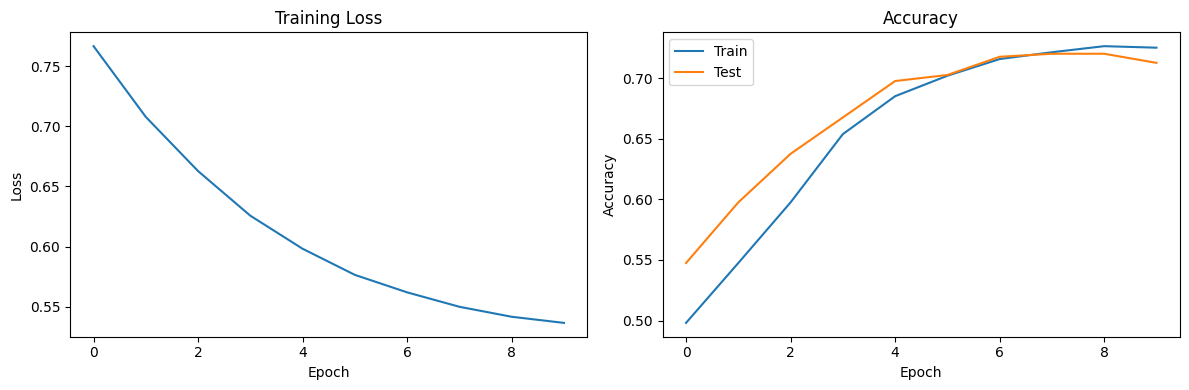

In [ ]:
# --- LASSO + SAINT
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Load your dataset
df = pd.read_csv('/content/synthetic_data_copula.csv')  # <-- Change path
X = df.drop(columns=['TYPE'])
y = df['TYPE']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply LASSO with CV
lasso_cv = LassoCV(alphas=np.logspace(-4, 1, 100), cv=5, random_state=42)
lasso_cv.fit(X_train_fs, y_train_fs)

best_alpha = lasso_cv.alpha_
print(f"\n✅ Best Alpha: {best_alpha:.4f}")

lasso = Lasso(alpha=best_alpha, random_state=42)
lasso.fit(X_train_fs, y_train_fs)

# Feature scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\n=== Feature Scores ===")
print(feature_scores)

# Select non-zero features
selected_features = feature_scores[feature_scores['Coefficient'] != 0]['Feature'].tolist()
print(f"\n✅ Selected Features ({len(selected_features)}):\n{selected_features}")

# Filter dataframe to selected features
X_selected = df[selected_features]

# --- SAINT Classification ---
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Train-test split on selected features
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Normalize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train.values)
y_test = torch.LongTensor(y_test.values)

# SAINT model
class SimpleSAINT(nn.Module):
    def __init__(self, input_dim, hidden_dim=64, num_heads=4, num_classes=2):
        super(SimpleSAINT, self).__init__()
        self.embedding = nn.Linear(input_dim, hidden_dim)
        self.attention = nn.MultiheadAttention(embed_dim=hidden_dim, num_heads=num_heads, batch_first=True)
        self.ffn = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim * 2),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(hidden_dim * 2, hidden_dim)
        )
        self.norm1 = nn.LayerNorm(hidden_dim)
        self.norm2 = nn.LayerNorm(hidden_dim)
        self.classifier = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        if len(x.shape) == 2:
            x = x.unsqueeze(1)
        attention_out, _ = self.attention(x, x, x)
        x = self.norm1(x + attention_out)
        ffn_out = self.ffn(x)
        x = self.norm2(x + ffn_out)
        x = torch.mean(x, dim=1)
        return self.classifier(x)

# Initialize model
num_classes = len(np.unique(y))  # supports multi-class
model = SimpleSAINT(input_dim=X_train.shape[1], hidden_dim=64, num_heads=4, num_classes=num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
train_losses, train_accuracies, test_accuracies = [], [], []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    _, pred_train = torch.max(outputs, 1)
    train_acc = accuracy_score(y_train.numpy(), pred_train.numpy())

    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        _, pred_test = torch.max(test_outputs, 1)
        test_acc = accuracy_score(y_test.numpy(), pred_test.numpy())

    train_losses.append(loss.item())
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    print(f"Epoch {epoch+1}/{num_epochs} | Loss: {loss.item():.4f} | Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")

# Final metrics
model.eval()
with torch.no_grad():
    final_outputs = model(X_test)
    _, final_pred = torch.max(final_outputs, 1)

print(f"\n✅ Final Test Accuracy: {accuracy_score(y_test.numpy(), final_pred.numpy()):.4f}")
print("\n=== Classification Report ===")
print(classification_report(y_test.numpy(), final_pred.numpy()))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test.numpy(), final_pred.numpy()))

# ROC-AUC only for binary
if num_classes == 2:
    y_probs = F.softmax(final_outputs, dim=1)[:, 1].numpy()
    auc_score = roc_auc_score(y_test.numpy(), y_probs)
    print(f"\nROC-AUC Score: {auc_score:.4f}")

# --- Plotting ---
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train')
plt.plot(test_accuracies, label='Test')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Best Alpha: 0.0534, Best L1 Ratio: 0.10
Epoch 1/10, Loss: 0.7281, Train Acc: 0.5350, Test Acc: 0.5825
Epoch 2/10, Loss: 0.6758, Train Acc: 0.5800, Test Acc: 0.6050
Epoch 3/10, Loss: 0.6366, Train Acc: 0.6288, Test Acc: 0.6125
Epoch 4/10, Loss: 0.6088, Train Acc: 0.6700, Test Acc: 0.6325
Epoch 5/10, Loss: 0.5897, Train Acc: 0.6987, Test Acc: 0.6450
Epoch 6/10, Loss: 0.5717, Train Acc: 0.7206, Test Acc: 0.6675
Epoch 7/10, Loss: 0.5599, Train Acc: 0.7281, Test Acc: 0.6750
Epoch 8/10, Loss: 0.5480, Train Acc: 0.7288, Test Acc: 0.6750
Epoch 9/10, Loss: 0.5404, Train Acc: 0.7400, Test Acc: 0.6850
Epoch 10/10, Loss: 0.5351, Train Acc: 0.7356, Test Acc: 0.6900

Final Test Accuracy: 0.6900

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.79      0.76       244
           1       0.62      0.54      0.58       156

    accuracy                           0.69       400
   macro avg       0.67      0.66      0.67       400
weighted avg  

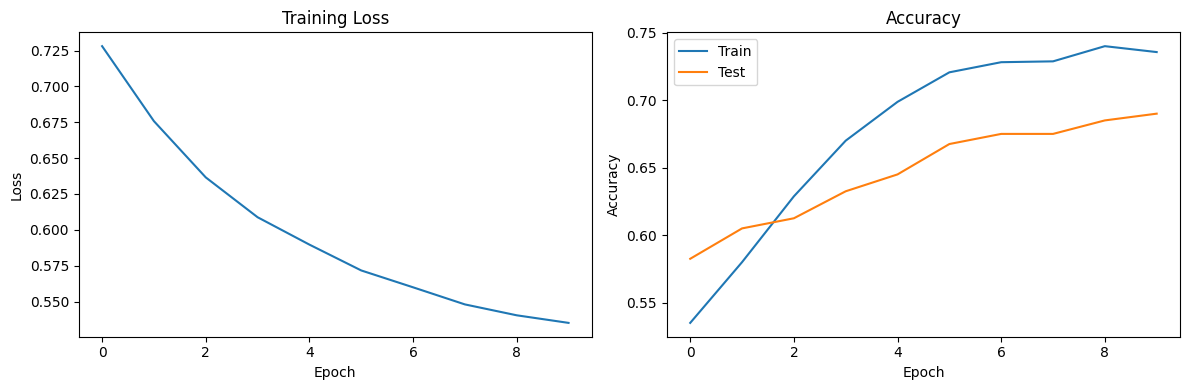

In [ ]:
# ELASTICNET + SAINT
import numpy as np
import pandas as pd
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Load your dataframe
df = pd.read_csv("/content/synthetic_data_copula.csv")

# Separate features and target variable
X = df.drop(columns=['TYPE'])
y = df['TYPE']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ElasticNetCV for feature selection
elasticnet_cv = ElasticNetCV(
    alphas=np.logspace(-4, 1, 100),
    l1_ratio=[0.1, 0.5, 0.7, 0.9, 1.0],
    cv=5,
    random_state=42
)
elasticnet_cv.fit(X_train_full, y_train_full)

# Best hyperparameters
best_alpha = elasticnet_cv.alpha_
best_l1_ratio = elasticnet_cv.l1_ratio_
print(f"Best Alpha: {best_alpha:.4f}, Best L1 Ratio: {best_l1_ratio:.2f}")

# Fit final ElasticNet model
elasticnet = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio, random_state=42)
elasticnet.fit(X_train_full, y_train_full)

# Get non-zero coefficient features
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': elasticnet.coef_
}).sort_values(by='Coefficient', ascending=False)
selected_features = feature_scores[feature_scores['Coefficient'] != 0]['Feature'].tolist()
X_selected = df[selected_features]

# Save selected features (optional)
# X_selected.to_csv("sel_features.csv", index=False)

# Recreate X and y with selected features
X = X_selected.values
y = df['TYPE'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# Define the SAINT model
class SimpleSAINT(nn.Module):
    def __init__(self, input_dim, hidden_dim=64, num_heads=4, num_classes=2):
        super(SimpleSAINT, self).__init__()
        self.embedding = nn.Linear(input_dim, hidden_dim)
        self.attention = nn.MultiheadAttention(embed_dim=hidden_dim, num_heads=num_heads, batch_first=True)
        self.ffn = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim * 2),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(hidden_dim * 2, hidden_dim)
        )
        self.norm1 = nn.LayerNorm(hidden_dim)
        self.norm2 = nn.LayerNorm(hidden_dim)
        self.classifier = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        if len(x.shape) == 2:
            x = x.unsqueeze(1)
        attention_out, _ = self.attention(x, x, x)
        x = self.norm1(x + attention_out)
        ffn_out = self.ffn(x)
        x = self.norm2(x + ffn_out)
        x = torch.mean(x, dim=1)
        x = self.classifier(x)
        return x

# Initialize model
input_dim = X_train.shape[1]
model = SimpleSAINT(input_dim=input_dim, hidden_dim=64, num_heads=4, num_classes=2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
train_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    _, predicted_train = torch.max(outputs.data, 1)
    train_acc = accuracy_score(y_train.numpy(), predicted_train.numpy())

    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        _, predicted_test = torch.max(test_outputs.data, 1)
        test_acc = accuracy_score(y_test.numpy(), predicted_test.numpy())

    train_losses.append(loss.item())
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}")

# Final evaluation
model.eval()
with torch.no_grad():
    final_outputs = model(X_test)
    _, predicted = torch.max(final_outputs.data, 1)
    final_accuracy = accuracy_score(y_test.numpy(), predicted.numpy())

print(f"\nFinal Test Accuracy: {final_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test.numpy(), predicted.numpy()))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test.numpy(), predicted.numpy()))

# ROC-AUC Score for binary
if len(set(y_test.numpy())) == 2:
    y_probs = F.softmax(final_outputs, dim=1)[:, 1].numpy()
    roc_auc = roc_auc_score(y_test.numpy(), y_probs)
    print(f"\nROC-AUC Score: {roc_auc:.4f}")

# Plot curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train')
plt.plot(test_accuracies, label='Test')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
